In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 

In [2]:
df = pd.read_csv("glass.csv")

In [3]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [16]:
df = df[["Na","Si"]]
df.head()

,Na,Si
0,13.64,71.78
1,13.89,72.73
2,13.53,72.99
3,13.21,72.61
4,13.27,73.08


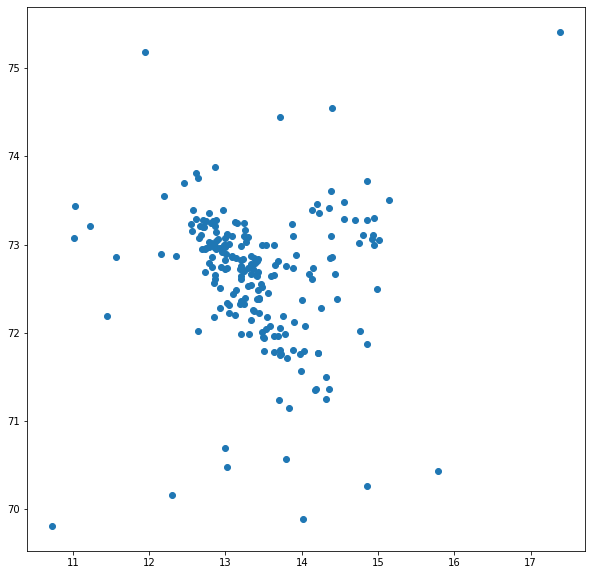

In [17]:
plt.figure(figsize = (10,10))
plt.scatter(df['Na'], df['Si'])
plt.show()

In [4]:
df = df.drop(columns = ["Type"])

In [5]:
# k distance plot 
from sklearn.neighbors import NearestNeighbors 

n = NearestNeighbors(n_neighbors = 9)
n_fit = n.fit(df)

distance,_ = n_fit.kneighbors(df)
distance = np.sort(distance, axis = 0)
distance = distance[:,1]

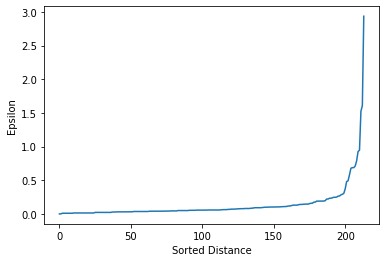

In [19]:
plt.plot(distance)
plt.xlabel("Sorted Distance")
plt.ylabel("Epsilon")
plt.show()

In [20]:
# from graph Epsilon = 0.3
from sklearn.cluster import DBSCAN 
model = DBSCAN(eps = 0.3, min_samples = 3)
model.fit(df) 
model.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0, -1,
        1, -1, -1, -1, -1, -1,  0, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1, -1,  1,  1,  0,
        0, -1, -1,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0, -1,  0,  0,
        0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

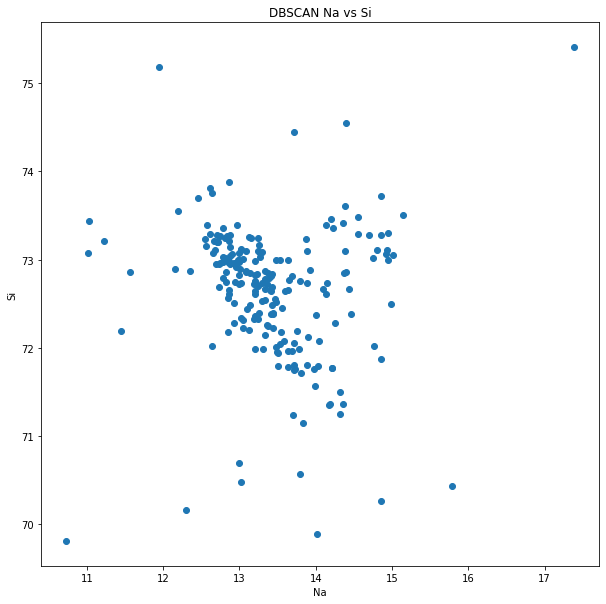

In [21]:
plt.figure(figsize = (10,10))
plt.scatter(df["Na"],df["Si"])
plt.xlabel("Na")
plt.ylabel("Si")
plt.title("DBSCAN Na vs Si")
plt.show()

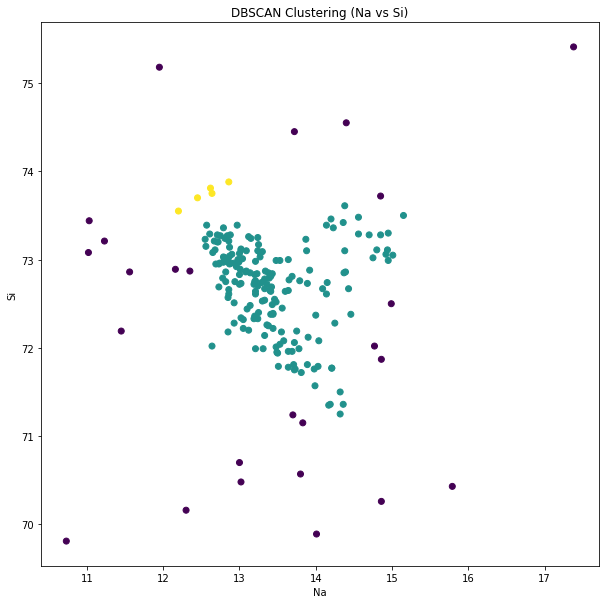

In [22]:
plt.figure(figsize = (10,10))
plt.scatter(df["Na"],df["Si"], c = model.labels_)
plt.xlabel("Na")
plt.ylabel("Si")
plt.title("DBSCAN Clustering (Na vs Si)")
plt.show()